# Reading asc files
Author: Mike Wood
Date: 3/14/24

This notebook shows how to read asc files from GIS programs into Python for processing.

#### Import the modules for this notebook
To read a file to an array, import `numpy`. If desired, a plot of the data can also be made with the `matplotlib` package for a sanity check.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Define a file path
Below, enter the file path to the data. This example demonstrates how to read a file in the same directory as this notebook.

In [2]:
file_name = 'BenthicTempRange.asc'

#### Retrieve the metadata from the file header
asc files have several lines of metadata in the file header. Here, we read these lines to the a dictionary.

In [3]:
# read the file as a regular text file
f = open(file_name)
lines = f.read()
f.close()

# test how many lines are in the file
lines = lines.split('\n')
print('There are '+str(len(lines))+' lines')

There are 2167 lines


The first 6 lines have the metadata values:

In [4]:
print(lines[:6])

['NCOLS 4320 ', 'NROWS 2160 ', 'XLLCORNER -180 ', 'YLLCORNER -90 ', 'CELLSIZE 0.0833333333333333 ', 'NODATA_value -9999 ']


Make a dictionary of these values:

In [5]:
metadata = {}
for i in range(6):
    metadata[lines[i].split()[0]] = float(lines[i].split()[1])
print(metadata)

{'NCOLS': 4320.0, 'NROWS': 2160.0, 'XLLCORNER': -180.0, 'YLLCORNER': -90.0, 'CELLSIZE': 0.0833333333333333, 'NODATA_value': -9999.0}


#### Define the geographical coordinates

With the metadata values handy, we can use them to make arrays for x and y (typically longitude and latitude for global data). We will set up an array to go from the center of the first cell on the east (south) cell of the grid to the center of the cell on the west (north) side of the grid for x (y), taking steps equal to the given step size.

First, create the x (or longitude) array:

In [6]:
lon = np.arange(metadata['XLLCORNER']+metadata['CELLSIZE']/2,
                metadata['XLLCORNER']+metadata['NCOLS']*metadata['CELLSIZE'],
                metadata['CELLSIZE'])
print(np.size(lon))

4320


Then, create the latitude array:

In [7]:
lat = np.arange(metadata['YLLCORNER']+metadata['CELLSIZE']/2,
                metadata['YLLCORNER']+metadata['NROWS']*metadata['CELLSIZE'],
                metadata['CELLSIZE'])
print(np.size(lat))

2160


#### Read the values to a grid:
After the metadata header lines, the rest of the data pertains to the grid. Here, we use `numpy`'s `genfromtxt` function for convenience:

In [8]:
# read the data past the header lines to a grid
grid = np.genfromtxt(file_name, delimiter='', skip_header=6)

# flip the grid on its y-axis becauae asc files go bottom up but numpy reads top down
grid = np.flipud(grid) 

print(np.shape(grid))

(2160, 4320)


Notice that the grid has the same amount of rows as the longitude array and the same amount of columns as the longitude array.

# Make a Plot
Next, we can make a plot of our data. However, before we visualize the data, its best to mask out the nodata values. We can leverage the no data value in the metadata dictionary for this purpose:

In [9]:
grid = np.ma.masked_where(grid==metadata['NODATA_value'], grid)

Finally, we can make a simple map to visualize the data:

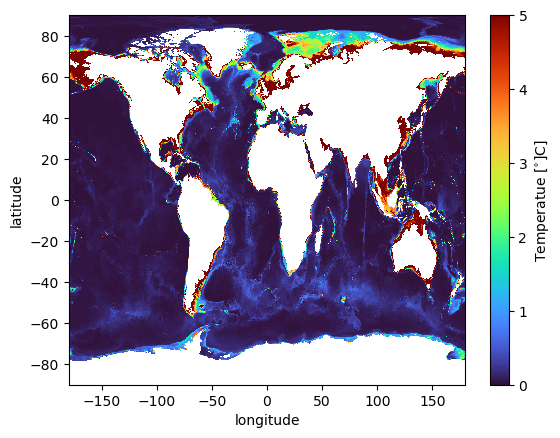

In [10]:
C = plt.pcolormesh(lon, lat, grid, vmin=0, vmax=5, cmap='turbo')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(C, label='Temperatue [$^{\circ}$]C]')
plt.show()